# \[PUBG Finish Placement Prediction\]

### Regression Data Analysis Project
### [Team 2] 김광준, 이한솔, 정민정, 홍창휘

---

# \# Contents

### \# [ Data Description](##-Data-Description)
### \# [ Data Fields](##-Data-Fields)
### \# [ Evaluation](##-Evaluation)


### 0. [ Load Dataset](#0.-Load-Dataset)
**0.0 Import Modules  
0.1 Load Train Data : `train.csv`**   
**0.2 Load Test Data : `test.csv`**
   
   
   
### 1. [ Pre-Exploration](#1.-Pre-Exploration)
**1.1 [Id]s**  
**1.2 [matchType]**  
   
   
   
### 2. [ EDA](#2.-EDA)
**2.1 PreProcessing  
2.2 Correlation  
2.3 Category  
2.4 Hackers  
2.5 Outlier**  



### 3. [ Regression](#3.-Regression)
**3.1 Preprocessing  
3.2 Regression**  


### 4. [ Submission](#4.-Submission)
**4.1 Preprocessing  
4.2 submission**

---

## \# Data Description

In a PUBG game, up to 100 players start in each match (matchId). Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. In game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves.

You are provided with a large number of anonymized PUBG game stats, formatted so that each row contains one player's post-game stats. The data comes from matches of all types: solos, duos, squads, and custom; there is no guarantee of there being 100 players per match, nor at most 4 player per group.

You must create a model which predicts players' finishing placement based on their final stats, on a scale from 1 (first place) to 0 (last place).

PUBG 게임에서는 100명의 플레이어가 각 (matchId)로써 경기를 시작을 합니다. Players는 (groupId)로써 팀으로 게임을 할 수도 있습니다. 각 게임의 마지막에 매겨지는 랭크(winPlacePerc)는 플레이어가 죽었을 때 살아있는 다른 플레이어들의 수로 매겨집니다.   


게임 내에서 각자 다른 무기나 군수품을 구할 수 있으며, 죽지 않고 기절한(쓰러져가는) 팀원을 살릴 수 있습니다. 또한 탈 것 들을 운전하거나 수영을 할 수도 있으며 뛰거나 총을 쏘기도 합니다. 팀원들은 서로 멀리 떨어지거나 뛰어 넘을 수도 있고, 또는 서로 없애기도 하는 많은 결과들을 경험하게 됩니다.  


DataSet은 대량의 익명화 된 PUGB 게임 통계자료입니다. 각각의 행에는 형식이 지정된 플레이어의 게임 통계가 포함 됩니다. 솔로, 듀오, 스쿼드 및 커스텀 등 모든 유형의 경기에서 나온 데이터 입니다. 경기 당 100명의 플레이어가 있다거나, 그룹 당 최대 4명의 플레이어가 있다는 보장은 없습니다. 최종 통계를 기반으로 플레이어의 마지막 순위를 예측하는 모델을 만들어야 합니다.

---

## \# Data Fields

### 1. **Id**
   - Player’s Id
   - 플레이어의 Id


### 2. **groupId**
   - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
   - 게임 내의 그룹 Id. 같은 그룹이 다른 경기에서 경기할 경우 매번 다른 groupId를 갖게 된다.


### 3. **matchId**
   - ID to identify match. There are no matches that are in both the training and testing set.
   - 게임(한 경기)의 Id. test와 training set에는 일치하는 게임이 없다.


### 4. **assists**
   - Number of enemy players this player damaged that were killed by teammates.
   - 팀원에 의해 죽은 적 플레이어 중 본인도 데미지를 입힌(즉 죽이는 데 도움을 준) 적 플레이어의 수


### 5. **boosts**
   - Number of boost items used.
   - 부스트 아이템을 사용한 수


### 6. **damageDealt**
   - Total damage dealt. Note: Self inflicted damage is subtracted.
   - 플레이어가 입힌 총 피해량 (자신의 의한 피해량은 제외)


### 7. **DBNOs**
   - Number of enemy players knocked.
   - 기절 시킨 적 플레이어의 수


### 8. **headshotKills**
   - Number of enemy players killed with headshots.
   - 헤드샷으로 죽인 적 플레이어의 수


### 9. **heals**
   - Number of healing items used.
   - 회복 아이템을 사용한 횟수
    
    
### 10. **killPlace**
   - Ranking in match of number of enemy players killed.
   - **경기 내**에서 적 플레이어를 죽인 횟수에 대한 순위


### 11. **killPoints**
   -  Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
   - **kill 수** 기반의 외부 플레이어 순위 - Elo ranking에서 kills에만 의존  
   \* Elo : 미국의 물리학 교수이자 체스 플레이어인 아르파드 엘뢰(Arpad Elo) 박사가 체스에서 플레이어들의 실력을 표현하기 위해 만든 레이팅  
   \* 플레이어끼리 대결을 하는 게임에서, 플레이어의 상대적인 실력을 평가하는 점수를 부여해서 비슷한 점수인 플레이어끼리 매치메이킹을 시키려는 목적으로 Elo 레이팅 또는 이를 응용한 레이팅을 사용하기도 한다.


### 12. **kills**
   - Number of enemy players killed.
   - 적 플레이어를 죽인 횟수


### 13. **killStreaks**
   - Max number of enemy players killed in a short amount of time.
   - 짧은 시간 내에 죽인 적 플레이어의 최대 수


### 14. **longestKill**
   - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
   - 다른 플레이어를 죽였을 때 죽은 플레이어와의 가장 긴 거리  
   \* 적 플레이어를 다운(죽기 직전)시킨 후 운전으로 적 플레이어에게서 멀리 떨어지는 경우 kill distance가 길어질 수 있으므로 이 데이터는 오해의 소지가 있을 수 있다.


### 15. **matchDuration**
   - Duration of match in seconds.
   - 게임 경과 시간
   

### 16. **matchType**
   - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
   - 게임 타입(문자형) - "솔로", "듀오", "스쿼드", "솔로-fpp", "듀오-fpp", "스쿼드-fpp" 가 있고, "기타"는 이벤트나 커스텀 매치이다.


### 17. **maxPlace**
   - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.


### 18. **numGroups**
   - Number of groups we have data for in the match.
   - 경기 당 그룹의 수


### 19. **rankPoints**
   - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
   - Elo와 비슷한 랭킹. 이 랭킹은 다음 버전에서는 사용되지 않으므로 주의해서 사용할 것. '-1'은 'None'을 뜻한다.


### 20. **revives**
   - Number of times this player revived teammates.
   - 팀원을 살린 횟수


### 21. **rideDistance**
   - Total distance traveled in vehicles measured in meters.
   - 운송수단을 이용하여 이동한 총 이동거리 (미터단위)


### 22. **roadKills**
   - Number of kills while in a vehicle.
   - 운송수단으로 치어 죽인 수


### 23. **swimDistance**
   - Total distance traveled by swimming measured in meters.
   - 수영으로 이동한 총 이동거리 (미터단위)


### 24. **teamkill**
   - Number of times this player killed a teammate.
   - 팀원을 죽인 횟수


### 25. **vehicleDestroys**
   - Number of vehicles destroyed.
   - 운송수단을 부순 횟수


### 26. **walkDistance**
   - Total distance traveled on foot measured in meters.
   - 걸어서 이동한 총 이동거리 (미터단위)


### 27. **weaponsAcquired**
   - Number of weapons picked up.
   - 무기를 주운 횟수


### 28. **winPoints**
   - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
   - **승리** 기반의 플레이어의 외부순위(랭킹) - Elo ranking에서 winning에만 의존
   - winPoints가 "0"이라면 "None"과 같다.


### 29. **winPlaceperc**
   -  **The target of prediction.** This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.
   - **예측 대상.** 백분위수로 나타난 승점이며, "1"은 1위, "0"은 경기의 마지막 순위에 해당합니다. 이 값은 numGroups가 아닌 maxPlace에서 계산되므로 경기에서 누락된 chunks가 있을 수 있습니다

---

## \# Evaluation

### MAE(Mean Absolute Error)
$$MAE = \dfrac{\sum_{i=1}^n|{y_i - x_i}|}{N} = \dfrac{\sum_{i=1}^n|{e_i}|}{N}$$

---

# 0. Load Dataset

## 0.0 Import Modules

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_absolute_error
from patsy import dmatrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

%matplotlib inline

## 0.1 Load Train Data : `train.csv`

#### 데이터 메모리 축소(983.90 MB => 273.0 MB)
1. **reduce_mem_usage** 함수
    - numeric type 컬럼들의 min, max를 체크하여 min, max 범위를 수용하는 데이터 타입으로 변환
2. `matchId`을 Category type으로 변환

In [2]:
# 메모리 축소 함수
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [3]:
# 용량이 축소된 데이터 로드
train = reduce_mem_usage(pd.read_csv("train.csv"))
# matchId column Category type으로 변환
train["matchId"] = train["matchId"].astype("category")
print(train.shape)
train.head()

Memory usage of dataframe is 983.90 MB
Memory usage after optimization is: 288.39 MB
Decreased by 70.7%
(4446966, 29)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00000,0,0,0,60,...,0,0.000000,0,0.000000,0,0,244.75,1,1466,0.444336
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.50000,0,0,0,57,...,0,0.004501,0,11.039062,0,0,1434.00,5,0,0.640137
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00000,0,0,0,47,...,0,0.000000,0,0.000000,0,0,161.75,2,0,0.775391
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90625,0,0,0,75,...,0,0.000000,0,0.000000,0,0,202.75,3,0,0.166748
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00000,0,0,0,45,...,0,0.000000,0,0.000000,0,0,49.75,2,0,0.187500


#### `train.csv`의 Columns 개수 확인

In [3]:
cols = list(train.columns)
len(cols)

29

: **Data Field**에서와 같이 총 29개의 컬럼이 있음을 확인할 수 있음

In [4]:
describe = train.describe()
describe

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


## 0.2 Load Test Data :  `test.csv`

In [5]:
test = pd.read_csv("test.csv")
print(test.shape)
test.head()

(1934174, 28)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2963.0,4,0


#### `test.csv`의 Columns 개수 확인

In [6]:
cols = list(test.columns)
len(cols)

28

: **Target \[`winPlacePerc`\]**를 제외하고 나머지는 train의 column과 동일하므로, 총 28개가 있음

---

# 1. Pre-Exploration

## 1.1 [Id]s


### 1.1.1 `Id` : 각 플레이어의 고유 Id (like `Index`)

In [7]:
train.shape, test.shape

((4446966, 29), (1934174, 28))

- **train**은 총 **4,446,966**개, **test**는 총 **1,934,174개**의 데이터를 가지고 있음

In [8]:
len(list(set(train["Id"]))), len(list(set(test["Id"])))

(4446966, 1934174)

- **set의 개수**가 **총 데이터 개수**와 같은 것을 보아 Id는 **모든 데이터가 다른 값을 가짐**을 확인할 수 있음

### 1.1.2 `matchId` : 각 match의 고유 Id

- 한 matchId에 포함된 플레이어의 수 확인

In [9]:
len(train[train["matchId"] == "a10357fd1a4a91"])

96

- `matchId = "a10357fd1a4a91"`, 인 match에 참여한 플레이어는 96명이고, 최대 참여인원인 100명에서 네 명이 빠졌음을 알 수 있음

### 1.1.3 `groupId` : 각 match 내의 각 그룹의 고유 Id

- 아래와 같이 팀이 아닌 **개인 플레이어**는 **혼자만의 groupId**를 가짐

In [10]:
len(train[train["groupId"] == "de04010b3458dd"])

1

- 반면 팀인 경우 같은 팀원은 서로 같은 groupId를 가짐 
- 아래는 4명이 한팀으로써 같은 groupId를 가지는 것을 확인할 수 있음

In [11]:
len(train[train["groupId"] == "4d4b580de459be"])

4

>- **`Id`**는 플레이어의 고유번호로, 모든 데이터에서 단 하나도 겹치지 않는다.  
>- **`matchId`**는 각 match의 고유번호로, 한 match 당 정원은 100명이지만 100명 이하의 플레이어가 있을 수 있다.    
>- **`groupId`**는 팀별 고유번호로, 개인플레이어는 혼자만의 groupId를, 팀플레이어는 팀원끼리 같은 groupId를 가진다.

## 1.2 [matchType]

- `train` 데이터에 총 47,965번의 match가 존재함

In [12]:
train_match = train.groupby("matchId").apply(lambda x: x["matchType"].unique()[0])
len(train_match)

47965

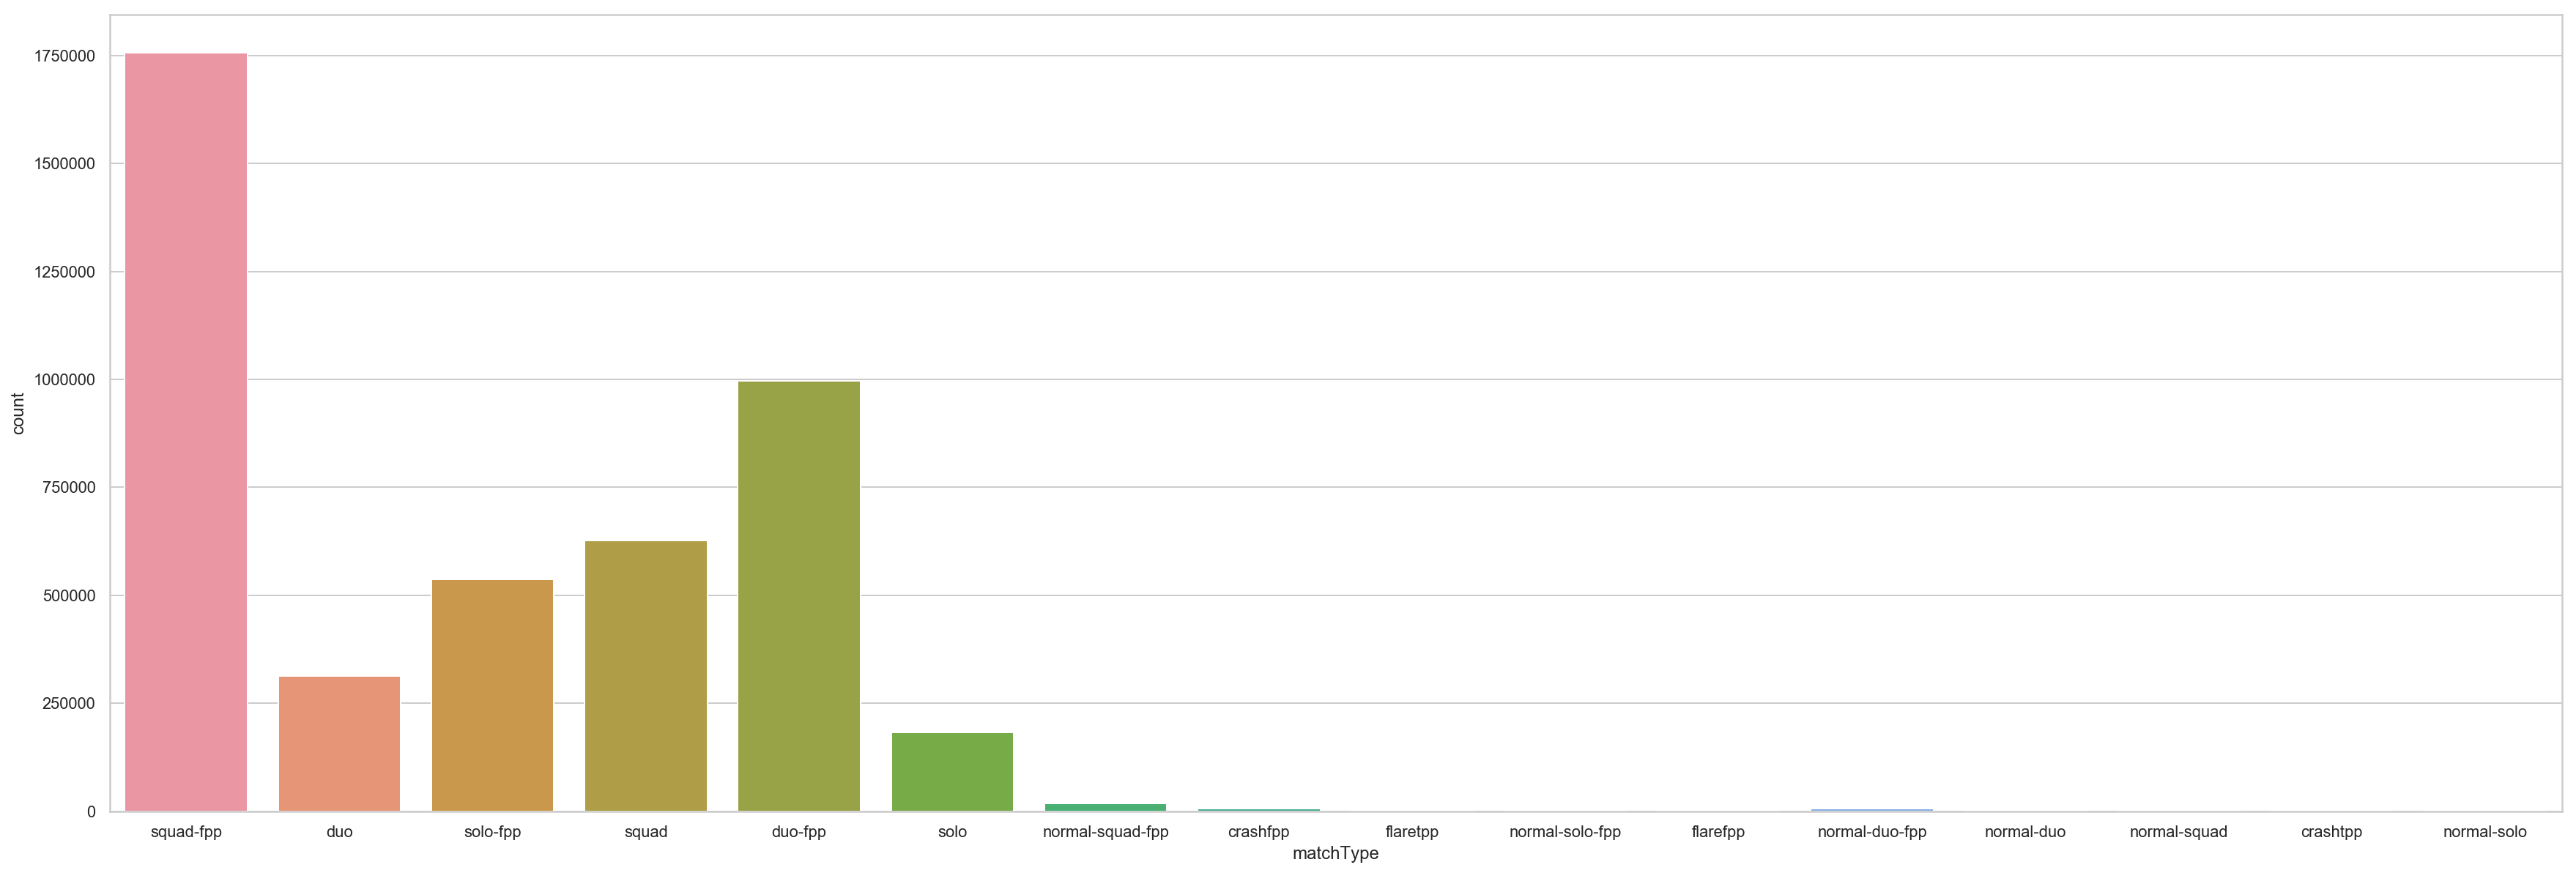

In [13]:
plt.figure(figsize=(30, 10))
sns.countplot(train["matchType"])
plt.show()

### 1.2.1 [squad-fpp] match 심층탐색

- `squad-fpp`의 타입을 가지는 한 match를 추출

In [170]:
m1 = train[train["matchId"] == train["matchId"][0]]
print(m1.shape)
m1.head()

(96, 31)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,items
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000000,0,0,0,60,...,0,0.0,0,0,244.75000,1,1466,0.444336,244.75000,1
14605,09824fabf2cdc0,7e5fb71e05a678,a10357fd1a4a91,1,1,335.500000,3,1,1,29,...,0,0.0,1,0,2136.00000,7,1487,0.814941,2136.00000,9
56361,72dfd1f3796a0e,80d9f9014c6e68,a10357fd1a4a91,0,0,0.000000,0,0,0,82,...,0,0.0,0,0,28.34375,0,1500,0.074097,28.34375,0
94575,17cf1ec59eb8c3,74898d59ac4879,a10357fd1a4a91,0,0,95.875000,0,0,3,28,...,0,0.0,0,0,3490.00000,6,1495,0.852051,3490.00000,9
124418,6472d358a8b956,5112ebf44e9575,a10357fd1a4a91,0,2,22.015625,1,1,0,24,...,0,0.0,0,0,2570.00000,5,1474,0.962891,2570.00000,7


- 한 match 내에서 같은 값을 가지는 column  
: `Id`, `groupId`, `matchId`, `matchType`, `matchDuration`, `maxPlace`, `numGroups`

In [172]:
print(len(list(set(m1["matchId"]))), len(list(set(m1["matchType"]))))
m1[["Id", "groupId", "matchId", "matchType", "matchDuration", "maxPlace", "numGroups"]].head()

1 1


,Id,groupId,matchId,matchType,matchDuration,maxPlace,numGroups
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,squad-fpp,1306,28,26
14605,09824fabf2cdc0,7e5fb71e05a678,a10357fd1a4a91,squad-fpp,1306,28,26
56361,72dfd1f3796a0e,80d9f9014c6e68,a10357fd1a4a91,squad-fpp,1306,28,26
94575,17cf1ec59eb8c3,74898d59ac4879,a10357fd1a4a91,squad-fpp,1306,28,26
124418,6472d358a8b956,5112ebf44e9575,a10357fd1a4a91,squad-fpp,1306,28,26


-  그룹 당 팀원수

In [175]:
print("팀 개수: ", len(list(set(m1["groupId"]))))
m1.groupby("groupId").agg('count').describe()["Id"]

팀 개수:  26


count    26.000000
mean      3.692308
std       1.568929
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       8.000000
Name: Id, dtype: float64

> 26개 팀, 1명~8명으로 다양  
`squad-fpp`이므로 주로 3~5명이 팀을 이룸

- matchId 컬럼을 groupby로 묶어서 그 match에 있었던 플레이어 수로 변환

In [230]:
train["numMatchMembers"] = train.groupby("matchId")["matchId"].transform('count')

- 각 match에 몇 명의 플레이어가 있는지 확인

In [232]:
str(round(len(train[train["numMatchMembers"] < 80]) / len(train) * 100, 2)) + "%"

'1.61%'

- 98% 이상의 데이터는 모두 한 게임에 80명 이상의 플레이어가 게임을 하므로 80명 이상의 데이터만 확인

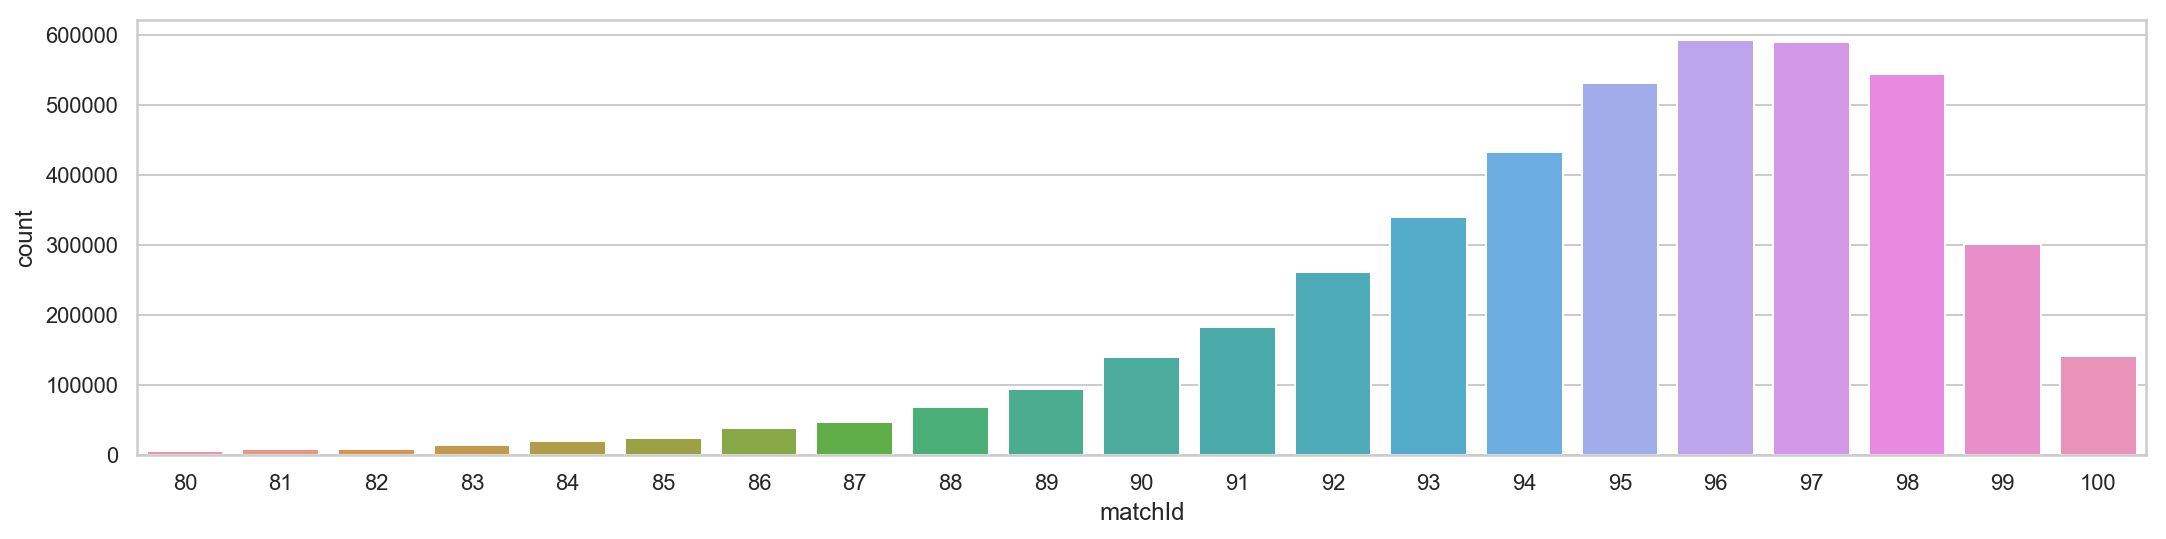

In [53]:
figure, ax = plt.subplots()
figure.set_size_inches(18, 4)

sns.countplot(data=train[train["matchId"] >= 80], x="matchId")
plt.show()

- 거의 모든 데이터가 90 ~ 98 정도의 플레이어 수로 이뤄졌음을 알 수 있음

In [234]:
train.drop("numMatchMembers", axis=1, inplace=True)

---

# 2. EDA

## 2.1 Preprocessing

### 2.1.1 EDA 데이터 준비

In [4]:
train_EDA = train.copy()

### 2.1.2 Null 처리
- winPlacePerc(Target Value)가 NaN인 데이터가 존재함
- match에 참여한 인원이 혼자인 케이스로, 이러한 케이스는 테스트 데이터에서 존재하지 않으므로 해당 데이터 삭제함

In [5]:
null_idx = train_EDA[train_EDA['winPlacePerc'].isnull()].index
train_EDA.loc[null_idx, 'winPlacePerc']

2744604   NaN
Name: winPlacePerc, dtype: float16

In [6]:
# Null data 삭제
train_EDA.drop(2744604, inplace=True)

In [7]:
# 삭제 확인
train_EDA[train_EDA['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


### 2.1.3 `groupId`를 `numGroupMembers`(그룹 내 팀원 수)로 변경
- groupId는 매 match 마다 달라지는 값이기 때문에 예측에 도움되지 않으므로 그룹 내 팀원수로 변경

In [8]:
train_EDA["groupId"] = train_EDA.groupby("groupId")["groupId"].transform('count')
train_EDA.rename(columns= {"groupId": "numGroupMembers"}, inplace=True)
train_EDA["groupId"].tail()

4446961    5
4446962    1
4446963    3
4446964    4
4446965    1
Name: groupId, dtype: int64

### 2.1.4 `matchId`를 `numMatchMembers`(match 참여 인원수)로 변경
- matchId는 각 match의 고유한 아이디
- 테스트 데이터에는 동일한 match가 존재하지 않기 때문에 예측에 도움이 되지 않으므로 match 참여 인원으로 변경

In [9]:
train_EDA["matchId"] = train_EDA.groupby("matchId")["matchId"].transform('count')
train_EDA.rename(columns= {"matchId": "numMatchMembers"}, inplace=True)
train_EDA["matchId"].tail()

4446961    94
4446962    93
4446963    98
4446964    94
4446965    98
Name: matchId, dtype: int64

## 2.2 Correlation

### 2.2.1 모든 columns간의 상관관계

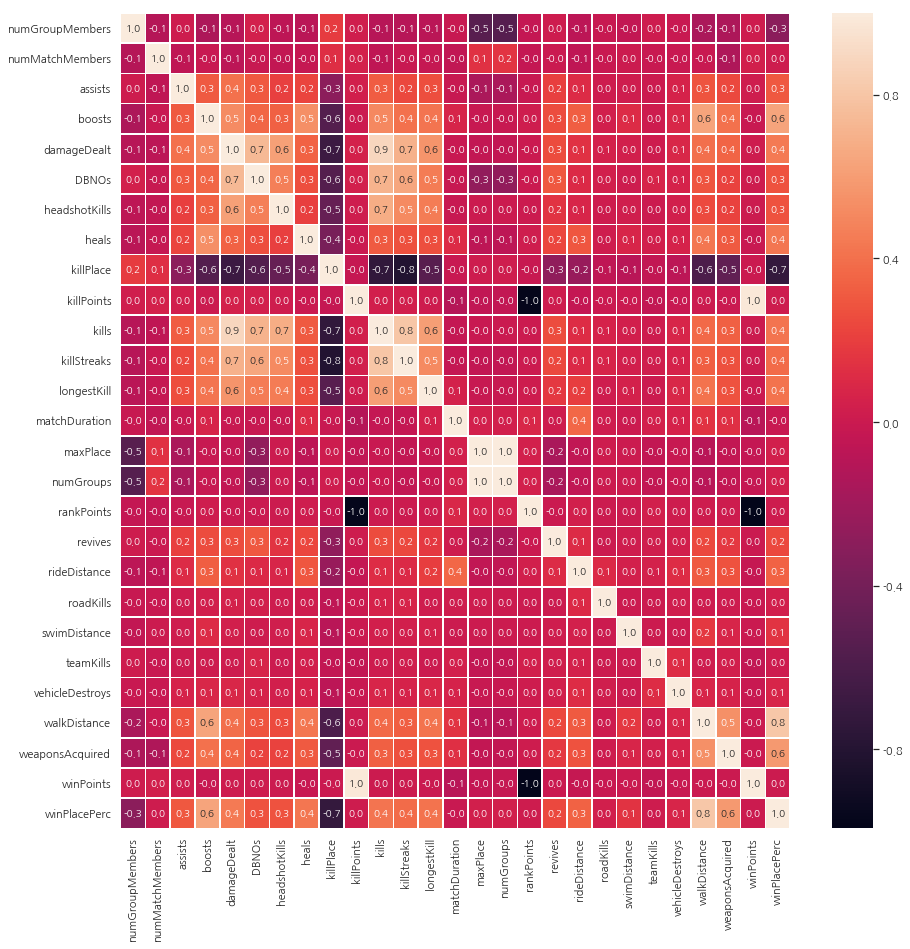

In [19]:
corr = train_EDA.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

In [25]:
# '-limit >= 상관계수 or limit <= 상관계수' 인 관계 추출 함수
def extract_corr(matrix_corr, limit):
    li_corr = [[row, col, matrix_corr.loc[row, col]]
                 for i, row in enumerate(matrix_corr.columns[:-2]) 
                 for col in matrix_corr.columns[i+1:-1] 
                 if np.abs(matrix_corr.loc[row, col]) >= limit]
    df_corr = pd.DataFrame(li_corr, columns=["Feature1", "Feature2", "corr"])
    df_corr.sort_values(by="corr", ascending=False, inplace=True)
    df_corr.reset_index(drop=True, inplace=True)
    return df_corr

### 2.2.2 상관계수(0.8 이상 or -0.8 이하)

In [26]:
df_corr = extract_corr(train_corr, 0.8)
df_corr

,Feature1,Feature2,corr
0,maxPlace,numGroups,0.997900
1,killPoints,winPoints,0.983417
2,damageDealt,kills,0.888784
3,kills,killStreaks,0.802500
4,killPlace,killStreaks,-0.810516
5,killPoints,rankPoints,-0.975555
6,rankPoints,winPoints,-0.993845


>- 양의 상관관계
    1. maxPlace & numGroups : 0.997900
    2. killPoints & winPoints : 0.983417
    3. kills & damageDealt : 0.888784
    4. kills & killStreaks : 0.802500

>- 음의 상관관계
    1. rankPoints & winPoints : -0.993845
    2. rankPoints & killPoints : -0.975555
    3. killPlace & killStreaks : -0.810516

### 2.2.3 `killPoints` & `winPoints` VS. `rankPoints`

- rankPoints는 killPoints, winPoints와 모두 상관계수가 -1.0에 가깝게 나타났음
- killPoints와 winPoints는 상관계수가 1.0에 가깝게 나타났음

#### 2.2.3.1 `rankPoints` vs `killPoints`

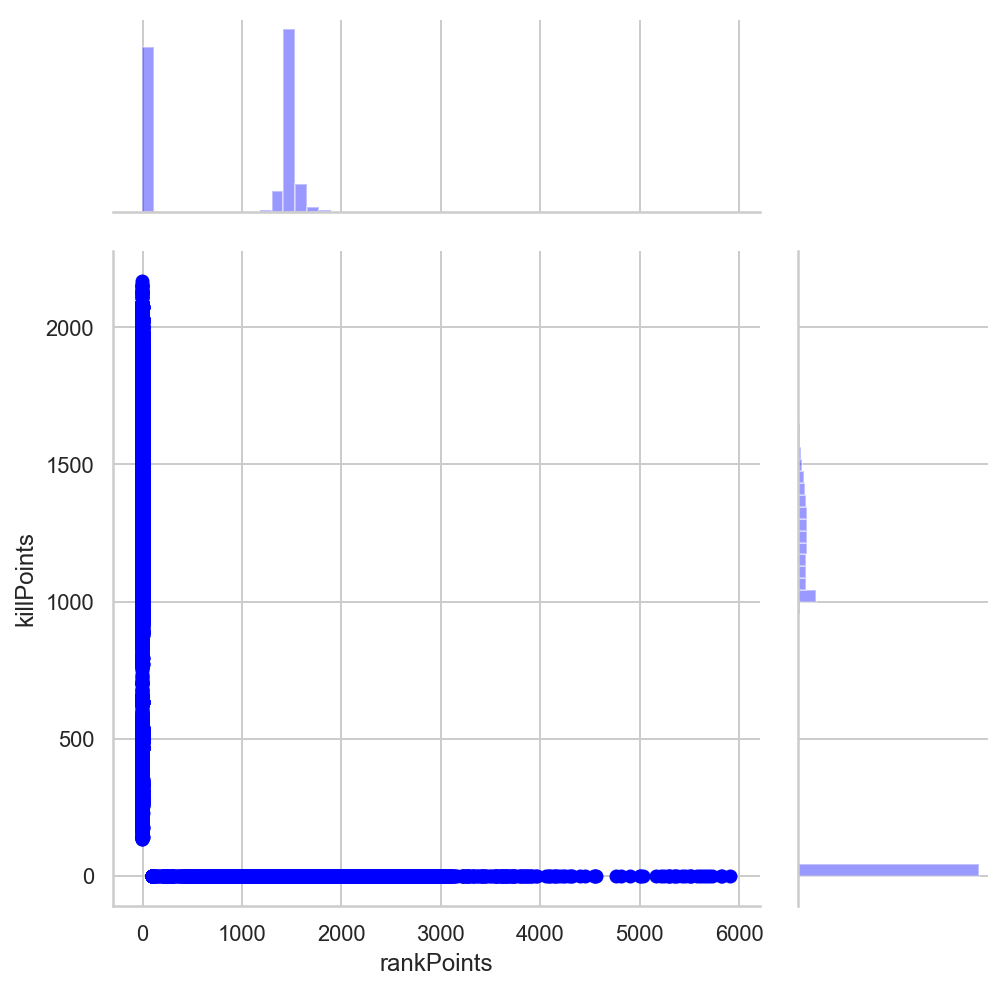

In [20]:
sns.jointplot(x="rankPoints", y="killPoints", data=train_EDA, height=7, ratio=3, color='blue')
plt.show()

- 그래프를 보면 rankPoint와 killPoint는 각각의 축에 분포해있음  
- 이는 rankPoint와 killPoint는 서로 **배반사건**으로 분포해 있다는 것을 나타냄  
- 즉, **각각의 데이터가 `rankPoint`값을 가지면 `killPoint`값은 없고, 반대의 경우 또한 성립함.**

#### 2.2.3.2 `rankPoints` vs `winPoints`

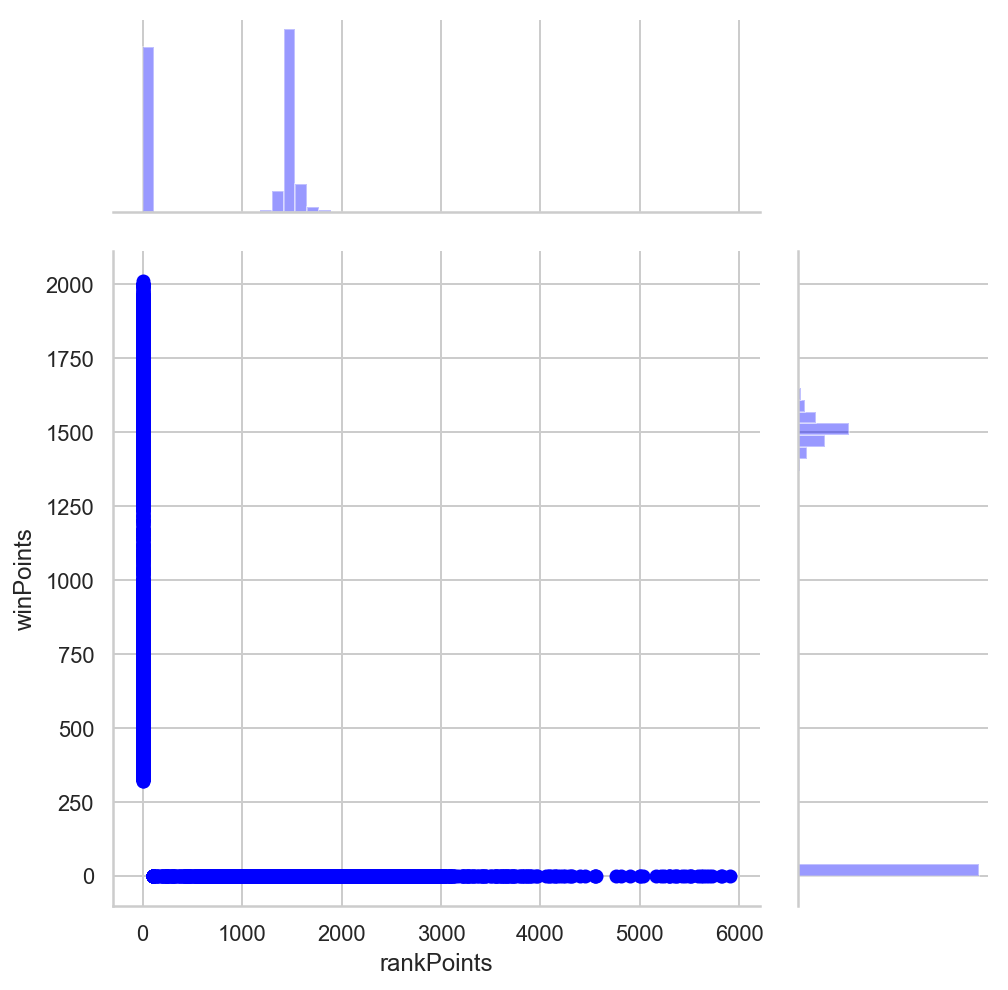

In [21]:
sns.jointplot(x="rankPoints", y="winPoints", data=train_EDA, height=7, ratio=3, color='blue')
plt.show()

- `winPoints`와 `rankPoints` 또한 위와 같음을 알 수 있음  

#### 2.2.3.3 Point System

- 모든 데이터는 `rankPoints`값만 가지고 있거나, `killPoints`와 `winPoints` 값만 가지고 있음  
- 이는, **이전 Point System**(`killPoints`, `winPoints`)과 게임 업데이트로 인해 **변경된 Point System**(`rankPoints`)에서 플레이한 유저들이 한 데이터셋에 **공존**하면서 발생된 현상으로 생각됨  
- 이후로는 이전 Point System은 **killwinSystem**으로, 변경된 Point System은 **rankSystem**으로 칭하겠음

#### 2.2.3.4 killwinSystem

- **killwinSystem**에서 플레이한 유저들의 `rankPoints`는 0또는 -1의 값을 가짐

In [31]:
killwinPoints = train_EDA[(train_EDA["rankPoints"] == 0) | (train_EDA["rankPoints"] == -1)]
print(killwinPoints.shape)
killwinPoints[["rankPoints", "winPoints", "killPoints"]].tail()

(1791319, 29)


,rankPoints,winPoints,killPoints
4446939,-1,1539,1255
4446948,-1,1500,1138
4446953,-1,1551,1364
4446954,-1,1502,1007
4446961,-1,1507,1029


- **killwinSystem**은 전체 데이터의 **40.28%**임

In [37]:
print("{}({:.2f}%)".format(len(killwinPoints), 100 * len(killwinPoints) / len(train_EDA)))

1791319(40.28%)


#### 2.2.3.5 rankSystem

- **rankSystem**에서 플레이한 유저들의 `winPoints`와 `killPoints`는 0을 가짐

In [33]:
onlyrankPoints = train[(train["rankPoints"] != 0) & (train["rankPoints"] != -1)]
print(onlyrankPoints.shape)
onlyrankPoints[["rankPoints", "winPoints", "killPoints"]].tail()

(2655646, 29)


,rankPoints,winPoints,killPoints
4446960,1477,0,0
4446962,1501,0,0
4446963,1500,0,0
4446964,1418,0,0
4446965,1590,0,0


- **rankSystem**은 전체 데이터의 **59.72%**임

In [39]:
print("{}({:.2f}%)".format(len(onlyrankPoints), 100 * len(onlyrankPoints) / len(train_EDA)))

2655646(59.72%)


- **rankSystem**과 **killwinSystem**은 **배반사건**임을 확일할 수 있다

In [34]:
# killwinPoints의 개수와 onlyrankPoints의 개수를 합하면 전체 데이터가 되는가? 
len(killwinPoints) + len(onlyrankPoints) == len(train)

True

#### 2.2.3.6 `killPoints` vs `winPoints`

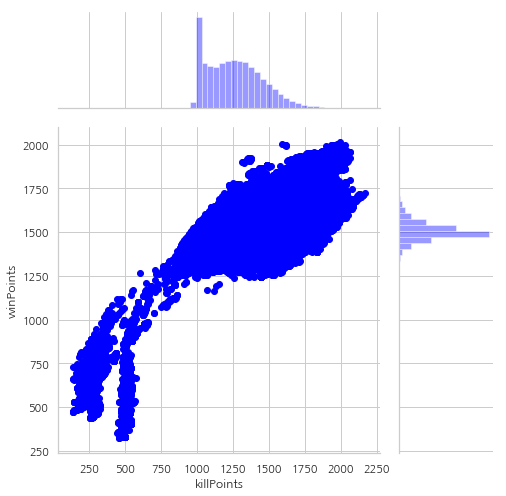

In [35]:
sns.jointplot(x="killPoints", y="winPoints", data=killwinPoints, height=7, ratio=3, color='blue')
plt.show()

- `killPoints`와 `winPoints`는 **비선형적인 상관관계(제곱근)**가 있음  
- pearson 상관계수는 0.44정도임  
- 이전의 0.983417라는 수치는 rankSystem(killPoints와 winPoints 모두 0)의 데이터가 포함되어 있어 나타난걸로 보임 

In [36]:
sp.stats.pearsonr(killwinPoints["killPoints"], killwinPoints["winPoints"])[0]

0.4446514555119456

### 2.2.4 `numGroups` VS. `maxPlace`
- 한 match의 `winPlacePerc`(Target Value)의 기본 단위는 대략 1 / (`maxPlace` - 1)
- 따라서 `numGroups` 보다 `maxPlace`가 많으면 중간에 스킵되는 부분이 있음
- `maxPalce`는 `numGroups`보다 항상 크거나 같음

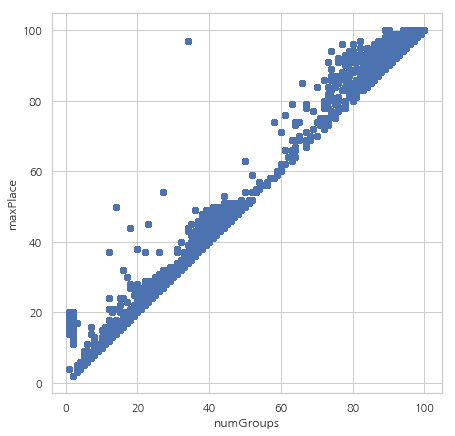

In [47]:
plt.figure(figsize=(7, 7))
plt.scatter(train_EDA["numGroups"], train_EDA["maxPlace"])
plt.xlabel("numGroups")
plt.ylabel("maxPlace")
plt.show()

- 41a634f62f86b7 match는 `maxPlace`가 97이고 `numGroups`가 34 임
- 그에 따라 `winPlacePerc`(Target Value)이 0.28125에서 0.76025391로 스킵하는 구간이 발생함

In [248]:
np.sort(train[train["matchId"] == "41a634f62f86b7"]["winPlacePerc"].unique())

array([0.        , 0.01039886, 0.02079773, 0.03120422, 0.04168701,
       0.05209351, 0.0625    , 0.07287598, 0.08331299, 0.09381104,
       0.10418701, 0.11462402, 0.125     , 0.13537598, 0.14575195,
       0.15625   , 0.16674805, 0.17712402, 0.1875    , 0.19787598,
       0.20825195, 0.21875   , 0.22924805, 0.23962402, 0.25      ,
       0.26049805, 0.27075195, 0.28125   , 0.76025391, 0.77099609,
       0.89599609, 0.91650391, 0.98974609, 1.        ])

- 독립변수들 중 가장 강한 양의 상관관계를 가짐
- 추후 maxPlace 또는 numGroups 중 하나를 삭제해야 될 것으로 판단됨

### 2.2.5 `kills` VS. `damageDealt`

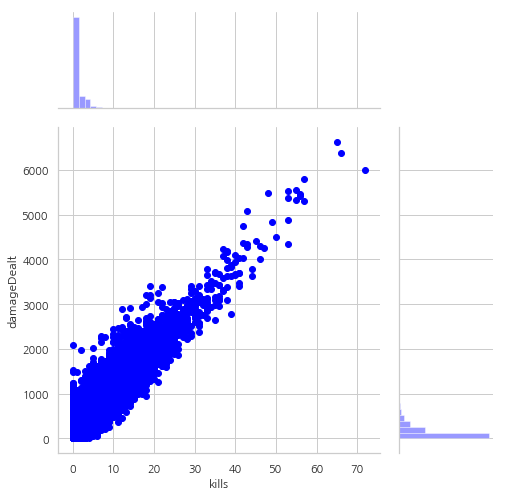

In [28]:
sns.jointplot(x="kills", y="damageDealt", data=train, height=7, ratio=3, color='blue')
plt.show()

- 강한 양의 상관관계를 가짐
- 이후 VIF를 통해 다중 공선성을 발생시키는 정도가 비교적 약하다고 판단함
- 그래프 하단부에 `damageDealt`가 0인데 `kills`가 0이상인 데이터가 분포함. 이후 hack 판단근거로 사용됨

### 2.2.6 `killStreaks` VS. `kills`

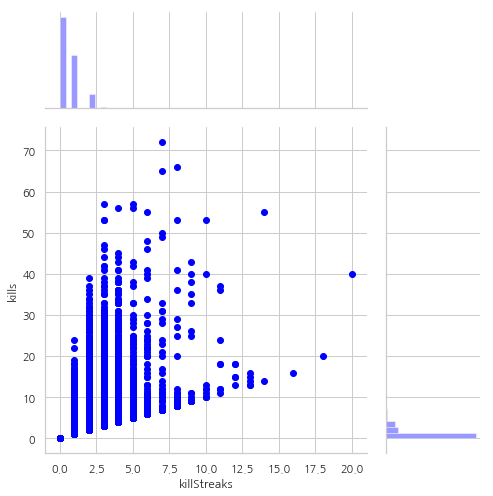

In [45]:
sns.jointplot(x="killStreaks", y="kills", data=train_EDA, height=7, ratio=3, color='blue')
plt.show()

- 방사형의 양의 상관관계를 가짐  
- 이후 VIF를 통해 다중공선성을 발생시키는 정도가 비교적 약하다고 판단함

### 2.2.7 `killStreaks` VS. `killPlace`

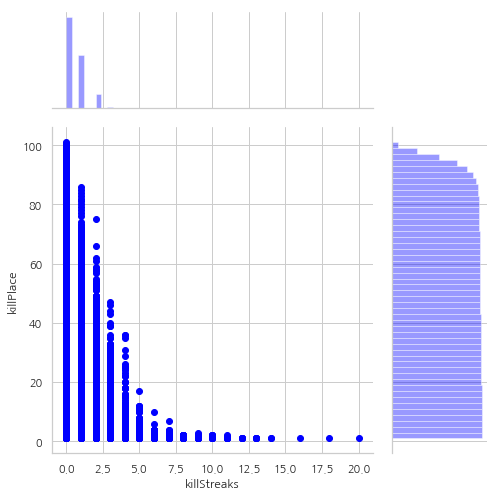

In [46]:
sns.jointplot(x="killStreaks", y="killPlace", data=train_EDA, height=7, ratio=3, color='blue')
plt.show()

- 비선형적인 음의 상관관계가 있음  
- 이후 VIF를 통해 다중공선성을 발생시키는 정도가 비교적 약하다고 판단함

## 2.3 Category

### 2.3.1 `matchType`
- `matchType`은 16가지로 이 중 6가지는 **normal type(99.2%)**이고 나머지 10가지는 **custom type(0.8%)**임
    - **normal type**  
    solo, duo, squad, solo-fpp, duo-fpp, squad-fpp
    - **custom type**  
    그 외 나머지 10가지

#### 2.3.1.1 solo VS. solo-fpp
- solo와 solo-fpp는 분포 형태는 비슷하지만 분포 정도가 다름

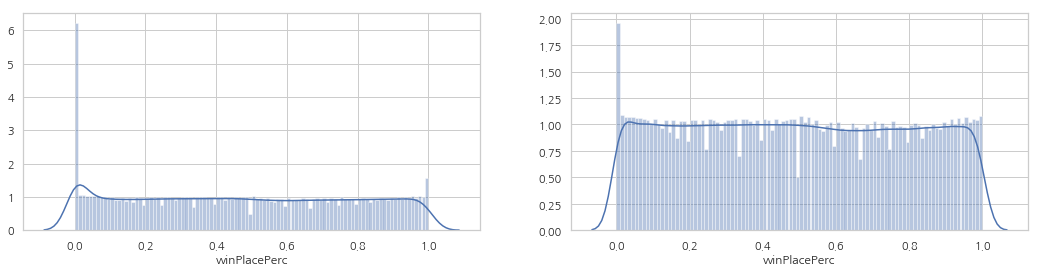

In [25]:
figure, (ax1, ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(18, 4)

sns.distplot(train_EDA[train_EDA["matchType"] == "solo"]["winPlacePerc"], bins=100, ax=ax1)
sns.distplot(train_EDA[train_EDA["matchType"] == "solo-fpp"]["winPlacePerc"], bins=100, ax=ax2)
plt.show()

#### 2.3.1.2 duo VS. duo-fpp
- duo와 duo-fpp는 분포 형태와 그 정도가 비슷함

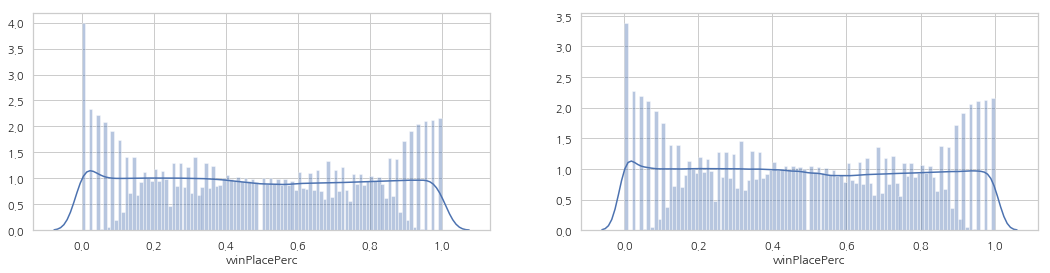

In [26]:
figure, (ax1, ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(18, 4)

sns.distplot(train_EDA[train_EDA["matchType"] == "duo"]["winPlacePerc"], bins=100, ax=ax1)
sns.distplot(train_EDA[train_EDA["matchType"] == "duo-fpp"]["winPlacePerc"], bins=100, ax=ax2)
plt.show()

#### 2.3.1.3 squad VS. squad-fpp
- squad와 squad-fpp는 분포 형태와 그 정도가 비슷함

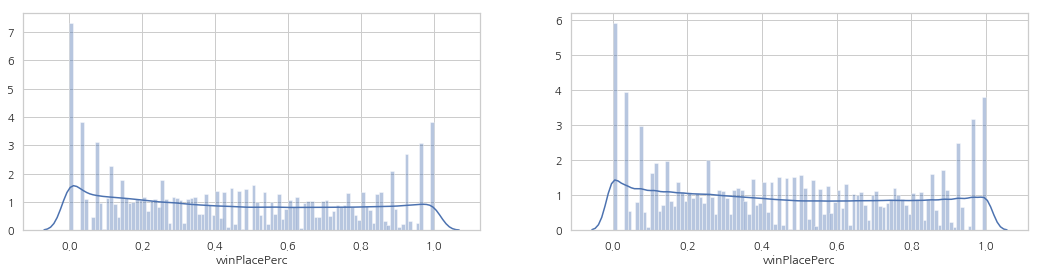

In [27]:
figure, (ax1, ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(18, 4)

sns.distplot(train_EDA[train_EDA["matchType"] == "squad"]["winPlacePerc"], bins=100, ax=ax1)
sns.distplot(train_EDA[train_EDA["matchType"] == "squad-fpp"]["winPlacePerc"], bins=100, ax=ax2)
plt.show()

#### 2.3.1.4 종합
- (duo, duo-fpp)와 (squad, squad-fpp)는 분포의 정도와 형태가 비슷하여 각각 하나의 카테고리로 묶어도 무방할 것으로 생각됨
- **BUT**, **각 type**의 플레이 형태가 엄연히 다르기 때문에(duo:3인칭, duo-fpp:1인칭) **각각의 의미를 유지**하기로 함 
- **custom match**는 데이터 수(0.8%)에 비해 카테고리 수가(10가지) 과도하게 많기 때문에 추후에 **하나의 카테고리로 묶음**

## 2.4 Hackers

 PUBG에는 다양한 hack이 존재함. 게임 유저들이 사용하는 여러 hack을 먼저 알아보면,  
   - **aim Hack** : 총의 초점을 자동으로 맞춰주어 게임의 진행을 쉽게 함
   - **speed Hack** : 이동 속도를 게임의 기본값 이상으로 키워 빠르게 이동하며 게임에 유리해지게 함

등이 있음. 이러한 hack이 데이터에 반영된 부분들을 판단하고 식별함

### 2.4.1 `damageDealt`가 0이면서 `kills`가 1이상

- 적에게 가한 데미지가 없는데(`damageDealt` = 0) 적을 죽인 것(`kills` 1 이상)은 일종의 hack으로 판단됨  
- 이러한 hack에 해당하는 유저는 **4,153명**임

In [130]:
len(train_EDA[(train_EDA["damageDealt"] == 0) & (train_EDA["kills"] != 0)])

4153

In [131]:
kills_without_damage = (train_EDA["damageDealt"] == 0) & (train_EDA["kills"] > 0)

### 2.4.2 `totalDistance`가 0이면서 `kills`가 1이상

- 걸은 거리(`walkDistance`), 수영한 거리(`swimDistance`), 운전한 거리(`rideDistance`)를 모두 합한 `totalDistance` 컬럼을 정의함  
- 플레이어가 이동(걷기, 수영, 운전)도 하지않고(`totalDistance` = 0) 적을 죽인 것(`kills`가 1 이상)은 일종의 hack으로 판단됨  
- 이러한 hack에 해당하는 유저는 **1,535명**임

In [132]:
train_EDA['totalDistance'] = train_EDA['rideDistance'] + train_EDA['walkDistance'] + train_EDA['swimDistance']
len(train_EDA[(train_EDA['kills'] > 0) & (train_EDA['totalDistance'] == 0)])

1535

In [133]:
kills_without_moving = (train_EDA['kills'] > 0) & (train_EDA['totalDistance'] == 0)

### 2.4.3 `totalDistance`가 0이면서 `items`가 1이상
- 획득한 무기수(`weaponsAcquired`), 치료 아이템(`heals`), 속도 증진 아이템(`boosts`)을 모두 합한 `items` 칼럼을 정의함  
- 플레이어가 이동(걷기, 수영, 운전)도 하지않고(`totalDistance` = 0) 아이템을 얻은 것은(`items`가 1 이상)은 일종의 hack으로 판단됨  
- 이러한 hack에 해당하는 유저는 **18,963명**임

In [134]:
train_EDA['items'] = train_EDA['heals'] + train_EDA['boosts'] + train_EDA['weaponsAcquired']
len(train_EDA[(train_EDA["totalDistance"] == 0) & (train_EDA["items"] > 0)])

18963

In [135]:
items_without_moving = (train_EDA["totalDistance"] == 0) & (train_EDA["items"] > 0)

### 2.4.4 `rideDistance`가 0이면서 `roadKills`가 1이상

- 운전한 거리가 없는데(`rideDistance` = 0) 적을 차량으로 죽인 것(`roadKills`가 1 이상)은 일종의 hack을 판단됨  
- 이러한 hack에 해당하는 유저는 **186명**임

In [136]:
len(train_EDA[(train_EDA['rideDistance'] == 0) & (train_EDA['roadKills'] > 0)])

186

In [137]:
kills_without_riding = (train_EDA['roadKills'] > 0) & (train_EDA['rideDistance'] == 0)

### 2.4.5 종합

- 본 프로젝트에서 판단한 hack에 해당하는 유저는 총 **23,331명**임  
- 이는 전체 데이터의 **0.5%** 정도임

In [139]:
hackers = kills_without_damage | kills_without_moving | items_without_moving | kills_without_riding
hackers.sum(), "{:.2f}%".format(hackers.sum() / len(train_EDA) * 100)

(23331, '0.52%')

- hack으로 인해 `winPlacePerc`(Target Value)가 높아지는 **advantage는 없는 것**으로 보임  
- 이는 `winPlacePerc`이 개인이 아니라 그룹단위로 정해지기 때문에 hack 영향력이 약해지는 것으로 판단됨  
- 이러한 hack은 데이터에서 **drop** 시킴

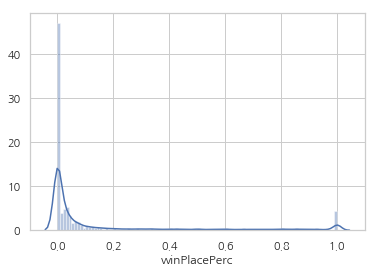

In [66]:
sns.distplot(train_EDA["winPlacePerc"][hackers], bins=100)
plt.show()

## 2.5 Outlier

- 각 feature 마다 굉장히 동떨어진 데이터들이 존재함
- `kills`의 경우 99%의 유저가 7명 이하로 죽였는데, 가장 많이 죽인 유저의 기록은 72명으로 이는 상당히 동떨어져 있음

In [245]:
print("99% 유저의 킬수 : {}명 이하".format(int(train_EDA["kills"].quantile(0.99))))
train_EDA["kills"].describe()

99% 유저의 킬수 : 7명 이하


count    4.446965e+06
mean     9.247835e-01
std      1.558445e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      7.200000e+01
Name: kills, dtype: float64

- **BUT**, outlier로 제거하기에는 **판단 기준이 부족**하고, 직접 try and error 하기에는 **시간이 부족**
- 모델에서 **Fox' Outlier Recommendation을 이용**하여 outlier을 선별하고 이들의 **경향을 파악**하기로 결정

# 3. Regression

## 3.1 Preprocessing

### 3.1.1 Regression 데이터 준비

In [105]:
train_reg = train.copy()

### 3.1.2 Null 처리
- winPlacePerc(Target Value)가 NaN인 데이터가 존재함
- match에 참여한 인원이 혼자인 케이스로, 이러한 케이스는 테스트 데이터에서 존재하지 않으므로 해당 데이터 삭제함

In [106]:
null_idx = train_reg[train_reg['winPlacePerc'].isnull()].index
train_reg.loc[null_idx, 'winPlacePerc']

2744604   NaN
Name: winPlacePerc, dtype: float16

In [107]:
# Null data 삭제
train_reg.drop(2744604, inplace=True)

In [108]:
# 삭제 확인
train_reg[train_reg['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,items


### 3.1.3 `groupId`를 `numGroupMembers`(그룹 내 팀원 수)로 변경
- groupId는 매 match 마다 달라지는 값이기 때문에 예측에 도움되지 않으므로 그룹 내 팀원수로 변경

In [109]:
train_reg["groupId"] = train_reg.groupby("groupId")["groupId"].transform('count')
train_reg.rename(columns= {"groupId": "numGroupMembers"}, inplace=True)
train_reg["numGroupMembers"].tail()

4446961    5
4446962    1
4446963    3
4446964    4
4446965    1
Name: numGroupMembers, dtype: int64

### 3.1.4 `matchId`를 `numMatchMembers`(match 참여 인원수)로 변경
- matchId는 각 match의 고유한 아이디
- 테스트 데이터에는 동일한 match가 존재하지 않기 때문에 예측에 도움이 되지 않으므로 match 참여 인원으로 변경

In [110]:
train_reg["matchId"] = train_reg.groupby("matchId")["matchId"].transform('count')
train_reg.rename(columns= {"matchId": "numMatchMembers"}, inplace=True)
train_reg["numMatchMembers"].tail()

4446961    94
4446962    93
4446963    98
4446964    94
4446965    98
Name: numMatchMembers, dtype: int64

### 3.1.5 `matchType`
- `matchType`은 16가지로 이 중 6가지는 **normal type(99.2%)**이고 나머지 10가지는 **custom type(0.8%)**임
    - **normal type**  
    solo, duo, squad, solo-fpp, duo-fpp, squad-fpp
    - **custom type**  
    그 외 나머지 10가지
- 10가지의 **custom type**은 "custom" 이라는 문자열로 치환하여 이후에 **하나로 인코딩**되게 함

In [121]:
normal_type = ['solo', 'duo', 'squad', 'solo-fpp', 'duo-fpp', 'squad-fpp']
train_reg["matchType"] = train_reg["matchType"]\
.apply(lambda x: x if x in normal_type else "custom")

메모리 축소를 위해 **category형으로 변환**

In [122]:
train_reg["matchType"] = train_reg["matchType"].astype("category")

### 3.1.6 Hackers
- EDA 과정에서 식별한 hack의 index 추출

In [142]:
hacker_idx = train_reg[hackers.values].index
len(hacker_idx)

23331

### 3.1.7 Point System

- **rankSystem** 유저들의 `killPoints`와 `winPoints`는 0임
- **killwinSystem** 유저들의 `rankPoints`는 -1 또는 0 임
- **killwinSystem** 유저들의 `rankPoints`를 0으로 통일하면 모델이 시스템 별로 나뉘게 됨
    - $\cdots + w_{\text{rank}}\text{rankPoints} + \cdots$
    - $\cdots + w_{\text{kill}}\text{killPoints} + w_{\text{winPoints}}\text{winPoints} + \cdots$
    
    
- 회귀분석 시 `rankPoints`, `killPoints`, `winPoints`는 **from_formula 함수를 이용하지 않고 직접 scaling** 함
    - `rankPoints` 내 0이 아닌 값들로(**rankSystem 유저**)만 scaling
    - `killPoints`, `winPoints` 내 0이 아닌 값들로(**killwinSystem 유저**)만 scaling

#### 3.1.7.1 pointSystem 칼럼 추가
- 추후 scaling 시 **rankSystem**과 **killwinSystem**을 구분하기 위한 용도

In [143]:
train_reg["pointsSystem"] = train_reg["rankPoints"].apply(lambda x: "kill&win" if (x == -1) or (x == 0) else "rank")
len(train_reg[train_reg["pointsSystem"]=="rank"]) / len(train_reg)

0.597181673343505

#### 3.1.7.2 `ranPoints` 내 -1을 0으로 변경

In [144]:
train_reg["rankPoints"] = train_reg["rankPoints"].apply(lambda x: 0 if x == -1 else x)

## 3.2 Regression

### 3.2.1 Point System 분리(rankSystem / killwinSystem)
- **rankSystem**과 **killwinSystem** 데이터를 분리하여 따로 회귀분석을 함

In [155]:
kill_win_points_reg = train_reg[train_reg["pointsSystem"] == "kill&win"]
only_rank_points_reg = train_reg[train_reg["pointsSystem"] == "rank"]
len(kill_win_points_reg), len(only_rank_points_reg)

(1791319, 2655646)

#### 3.2.1.1 rankSystem
- rankSystem 데이터 OLS

In [159]:
others = set(only_rank_points_reg.columns)\
    .difference(set(["Id", "matchType", "winPlacePerc", "killPoints", "winPoints", "pointsSystem"]))
others_scale = list(map(lambda x: "scale(" + x + ")", others))
model_rank = sm.OLS.from_formula(
    "winPlacePerc ~ " + "+".join(others_scale) + "+ C(matchType) + 0", only_rank_points_reg)
result_rank = model_rank.fit()
print(result_rank.summary())

                            OLS Regression Results                            
Dep. Variable:           winPlacePerc   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 4.742e+05
Date:                Thu, 15 Nov 2018   Prob (F-statistic):               0.00
Time:                        19:45:06   Log-Likelihood:             1.8193e+06
No. Observations:             2655646   AIC:                        -3.638e+06
Df Residuals:                 2655615   BIC:                        -3.638e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
C(matchType)[custom]      

#### 3.2.1.2 killwinSystem
- killwinSystem 데이터 OLS

In [160]:
others = set(kill_win_points_reg.columns)\
    .difference(set(["Id", "matchType", "winPlacePerc", "rankPoints", "pointsSystem"]))
others_scale = list(map(lambda x: "scale(" + x + ")", others))
model_killwin = sm.OLS.from_formula(
    "winPlacePerc ~ " + "+".join(others_scale) + "+ C(matchType) + 0", kill_win_points_reg)
result_killwin = model_killwin.fit()
print(result_killwin.summary())

                            OLS Regression Results                            
Dep. Variable:           winPlacePerc   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                 3.202e+05
Date:                Thu, 15 Nov 2018   Prob (F-statistic):               0.00
Time:                        19:55:07   Log-Likelihood:             1.2544e+06
No. Observations:             1791319   AIC:                        -2.509e+06
Df Residuals:                 1791287   BIC:                        -2.508e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
C(matchType)[custom]      

#### 3.2.1.3 MAE
- **rankSysmtem**의 잔차와 **killwinSystem**의 잔차를 이용하여 **MAE** 도출

In [161]:
(result_rank.resid.abs().sum() + result_killwin.resid.abs().sum()) / len(train_reg)

0.08876791518520574

### 3.2.2 Point System 통합(rankSystem + killwinSystem)
- rankSystem과 killwinSystem을 모두 유지하여 회귀분석함
- `rankPoints`, `killPoints`, `winPoints`는 **from_formula 함수를 이용하지 않고 직접 scaling** 함
    - `rankPoints` 내 0이 아닌 값들로(**rankSystem 유저**)만 scaling
    - `killPoints`, `winPoints` 내 0이 아닌 값들로(**killwinSystem 유저**)만 scaling

#### 3.2.2.1 Scaling

In [164]:
# 포인트 시스템 별로 평균, 표준편차 도출
df_moment = train_reg.groupby("pointsSystem")[["rankPoints", "winPoints", "killPoints"]].agg(['mean', 'std'])
df_moment

rankPoints               winPoints              killPoints  \
                    mean        std         mean        std         mean   
pointsSystem                                                               
kill&win         0.00000   0.000000  1505.542888  68.656642  1253.682174   
rank          1494.34089  89.583515     0.000000   0.000000     0.000000   

                          
                     std  
pointsSystem              
kill&win      197.273087  
rank            0.000000

> **rankSystem**
- rankPoints
    - mean : 1494.34089
    - std : 89.583515

> **killwinSystem**
- winPoints
    - mean : 1505.542888
    - std : 68.656642
- killPoints
    - mean : 1253.682174
    - std : 197.273087

In [166]:
# Point System의 평균, 표준편차 딕셔너리
points_moment = dict()
# rankSystem의 평균, 표준편차 삽입
points_moment["rank_mean"], points_moment["rank_std"] = df_moment.loc["rank", "rankPoints"]
# killwinSystem의 평균, 표준편차 삽입
points_moment["win_mean"], points_moment["win_std"], points_moment["kill_mean"], points_moment["kill_std"]\
    = df_moment.loc["kill&win", ["winPoints", "killPoints"]]

- Scaling 함수

In [167]:
 def scale_points(x):
    # rankSystem일 경우
    if x["rankPoints"].std() != 0:
        # rankSystem scaling
        x["rankPoints"] = (x["rankPoints"] - points_moment["rank_mean"]) / points_moment["rank_std"]
    # killwinSystem일 경우
    else:
        # killwinSystem scaling
        x["winPoints"] = (x["winPoints"] - points_moment["win_mean"]) / points_moment["win_std"]
        x["killPoints"] = (x["killPoints"] - points_moment["kill_mean"]) / points_moment["kill_std"]
    return x

- Scaling

In [168]:
train_reg_scaled = train_reg.groupby(by="pointsSystem").apply(scale_points)

#### 3.2.2.2 OLS

In [169]:
others = set(train_reg_scaled.columns)\
    .difference(set(["Id", "matchType", "winPlacePerc", "rankPoints", "winPoints", "killPoints", "pointsSystem"]))
others_scale = list(map(lambda x: "scale(" + x + ")", others))
model = sm.OLS.from_formula(
    "winPlacePerc ~ " + "+".join(others_scale) + "+ rankPoints + winPoints + killPoints + C(matchType) + 0", train_reg_scaled)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           winPlacePerc   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                 7.528e+05
Date:                Thu, 15 Nov 2018   Prob (F-statistic):               0.00
Time:                        22:19:53   Log-Likelihood:             3.0691e+06
No. Observations:             4446965   AIC:                        -6.138e+06
Df Residuals:                 4446932   BIC:                        -6.138e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
C(matchType)[custom]      

#### 3.2.2.3 MAE 

- MAE는 **0.088850** 정도임
- `rankPoints`, `killPoints`, `winPoints`를 컬럼 통째로 scaling 한 경우는 **0.088859** 정도로 소폭 증가함을 확인할 수 있음  
- **Point System을 분리한 경우(0.088767)**에 비해 **MAE가 큼(성능이 낮음)**
- 오차 정도가 크지 않다고 판단하여 **모델 단순화**를 위해 **Point System을 통합한 모델을 사용**하기로 결정함

In [178]:
pred = result.predict(train_reg_scaled)
mae = mean_absolute_error(train_reg_scaled.winPlacePerc, pred)
mae

0.08885005408454377

#### 3.2.2.4 Cross Validation
- Cross Validation 결과 MAE는 평균 **0.08885**임
- 위의 OLS 결과와 동일함

In [73]:
%%time
train_moment = dict()
others = set(train_reg.columns)\
    .difference(set(["Id", "matchType", "winPlacePerc", "rankPoints", "winPoints", "killPoints", "pointsSystem"]))
others_scale = list(map(lambda x: "scale(" + x + ")", others))

scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(train_reg)):
    df_train = train_reg.iloc[idx_train]
    df_test = train_reg.iloc[idx_test]
    
    point_moment = df_train.groupby("pointsSystem")[["rankPoints", "winPoints", "killPoints"]].agg(['mean', 'std'])
    train_moment["rank_mean"], train_moment["rank_std"] = point_moment.loc["rank", "rankPoints"]
    train_moment["win_mean"], train_moment["win_std"], train_moment["kill_mean"], train_moment["kill_std"]\
    = point_moment.loc["kill&win", ["winPoints", "killPoints"]]
    
    def scale_points(x):
        if x["rankPoints"].std() != 0:
            x["rankPoints"] = (x["rankPoints"] - train_moment["rank_mean"]) / train_moment["rank_std"]
        else:
            x["winPoints"] = (x["winPoints"] - train_moment["win_mean"]) / train_moment["win_std"]
            x["killPoints"] = (x["killPoints"] - train_moment["kill_mean"]) / train_moment["kill_std"]
        return x
    
    df_train = df_train.groupby(by="pointsSystem").apply(scale_points)
    model = sm.OLS.from_formula(
        "winPlacePerc ~ " + "+".join(others_scale) + "+ rankPoints + winPoints + killPoints + C(matchType) + 0", df_train)
    result = model.fit()
    
    df_test = df_test.groupby(by="pointsSystem").apply(scale_points)
    pred = result.predict(df_test)
    mae = mean_absolute_error(df_test.winPlacePerc, pred)
    
    scores[i] = mae

scores

Wall time: 39min 26s


In [78]:
scores.mean()

0.08885112165705732

#### 3.2.2.5 VIF

- `numGroups`와 `maxPlace`의 선형 상관관계가 거의 1 이었기 때문에 VIF factor가 크게 나온 것으로 판단됨
- VIF factor가 가장 큰 `maxPlace` 삭제를 결정함  

In [225]:
# scaling 할 컬럼 설정
others = set(train_reg_scaled.columns)\
    .difference(set(["Id", "matchType", "winPlacePerc", "rankPoints", "winPoints", "killPoints", "pointsSystem"]))
# scaling 할 컬럼에 scale 함수 wrapping
others_scale = list(map(lambda x: "scale(" + x + ")", others))
# 모델 식 구성
formula = "+".join(others_scale) + "+ rankPoints + winPoints + killPoints + C(matchType) + 0"
# feature matrix
dfX = dmatrix(formula, train_reg_scaled, return_type="dataframe")
# target vector
dfy = train_reg[["winPlacePerc"]]

# VIF 계산 및 데이터 프레임 구성
vif = pd.DataFrame(columns=["VIF Factor"])
for i in range(dfX.shape[1]):
    vif.loc[i] = variance_inflation_factor(dfX.values, i)
vif["features"] = dfX.columns

In [226]:
vif.sort_values(by="VIF Factor").reset_index(drop=True)

,VIF Factor,features
0,1.025586,scale(roadKills)
1,1.025605,scale(teamKills)
2,1.032397,scale(swimDistance)
3,1.034710,scale(vehicleDestroys)
4,1.078157,rankPoints
5,1.171181,scale(revives)
6,1.180197,C(matchType)[duo]
7,1.251689,scale(matchDuration)
8,1.281837,winPoints
9,1.293535,scale(assists)


### 3.2.3 Point System 통합(rankSystem + killwinSystem) + maxPlace 제거
- rankSystem과 killwinSystem을 모두 유지하여 회귀분석함
- `rankPoints`, `killPoints`, `winPoints`가 scaling 된 데이터 사용
- `maxPlace` 제거 후 OLS 실행

#### 3.2.3.1 OLS

In [180]:
# from_formula에서 scaling 할 컬럼 설정
others = set(train_reg_scaled.columns)\
    .difference(set(["Id", "matchType", "winPlacePerc", "rankPoints", "winPoints", "killPoints", "pointsSystem", "maxPlace"]))
# from_formula에서 scaling 할 컬럼에 scale 함수 wrapping
others_scale = list(map(lambda x: "scale(" + x + ")", others))
# 모델 생성
model2 = sm.OLS.from_formula(
    "winPlacePerc ~ " + "+".join(others_scale) + "+ rankPoints + winPoints + killPoints + C(matchType) + 0", train_reg_scaled)
# OLS 실행
result2 = model2.fit()
# 결과 출력
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:           winPlacePerc   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                 7.769e+05
Date:                Thu, 15 Nov 2018   Prob (F-statistic):               0.00
Time:                        23:48:58   Log-Likelihood:             3.0687e+06
No. Observations:             4446965   AIC:                        -6.137e+06
Df Residuals:                 4446933   BIC:                        -6.137e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
C(matchType)[custom]      

#### 3.2.3.2 MAE

- MAE는 **0.088868** 정도임
- `maxPlace`를 제거하였을 경우 **R-square 관점**(F-statistic)에서는 **성능이 향상**됨
- `maxPlace`를 제거하기 전의 MAE(0.08885)에 비해 **높아짐(성능이 낮아짐)**

In [229]:
pred = result2.predict(train_reg_scaled)
mae = mean_absolute_error(train_reg_scaled.winPlacePerc, pred)
mae

0.08886897587555358

#### 3.2.3.3 Cross Validation
- Cross Validation 결과 평균 **0.08887** 정도의 MAE가 나옴
- `maxPlace`를 제거함으로써 **MAE가 오히려 높아진 것(성능이 낮아진것)이** 명확해짐
- `maxPlace`를 유지하기로 결정함

In [34]:
%%time
train_moment = dict()
others = set(train_reg.columns)\
    .difference(set(["Id", "matchType", "winPlacePerc", "rankPoints", "winPoints", "killPoints", "pointsSystem", "maxPlace"]))
others_scale = list(map(lambda x: "scale(" + x + ")", others))

scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(train_reg)):
    df_train = train_reg.iloc[idx_train]
    df_test = train_reg.iloc[idx_test]
    
    point_moment = df_train.groupby("pointsSystem")[["rankPoints", "winPoints", "killPoints"]].agg(['mean', 'std'])
    train_moment["rank_mean"], train_moment["rank_std"] = point_moment.loc["rank", "rankPoints"]
    train_moment["win_mean"], train_moment["win_std"], train_moment["kill_mean"], train_moment["kill_std"]\
    = point_moment.loc["kill&win", ["winPoints", "killPoints"]]
    
    def scale_points(x):
        if x["rankPoints"].std() != 0:
            x["rankPoints"] = (x["rankPoints"] - train_moment["rank_mean"]) / train_moment["rank_std"]
        else:
            x["winPoints"] = (x["winPoints"] - train_moment["win_mean"]) / train_moment["win_std"]
            x["killPoints"] = (x["killPoints"] - train_moment["kill_mean"]) / train_moment["kill_std"]
        return x
    
    df_train = df_train.groupby(by="pointsSystem").apply(scale_points)
    model = sm.OLS.from_formula(
        "winPlacePerc ~ " + "+".join(others_scale) + "+ rankPoints + winPoints + killPoints + C(matchType) + 0", df_train)
    result = model.fit()
    
    df_test = df_test.groupby(by="pointsSystem").apply(scale_points)
    pred = result.predict(df_test)
    mae = mean_absolute_error(df_test.winPlacePerc, pred)
    
    scores[i] = mae

scores

Wall time: 37min 11s


In [38]:
scores.mean()

0.08887001203657059

### 3.2.4 Point System 통합(rankSystem + killwinSystem) + Hacker, Outlier 제거
- rankSystem과 killwinSystem을 모두 유지하여 회귀분석함
- `maxPlace`는 유지함
- EDA 과정에서 선별한 **Hacker 제거**
- **Fox' Outlier Recommendation을 이용**하여 **outlier**를 선별하여 **제거**
- Hacker, Outlier 삭제 후 `rankPoints`, `killPoints`, `winPoints`는 **from_formula 함수를 이용하지 않고 직접 scaling** 함

#### 3.2.4.1 Fox` Outlier Recommendation
- Fox` Outlier Recommendation를 이용하여 outlier 선별
- 선별된 Outlier을 따로 분석하 후 그 경향을 파악하여 outlier의 모델을 따로 구성하려 했지만, 그 경향을 파악하지 못함
- 그에따라, 우선은 Outlier를 제거하기로 결정함

In [52]:
influence = result.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(train_reg) - len(result.params) - 1)
outlier_idx = np.where(cooks_d2 > fox_cr)[0]

#### 3.2.4.2 Hacker + Outlier 제거

In [54]:
remove_idx = set(np.hstack([outlier_idx, hacker_idx]))
remain_idx = list(set(range(len(train_reg))).difference(remove_idx))
train_reg_removed = train_reg.iloc[remain_idx, :].reset_index(drop=True)

#### 3.2.4.3. Scaling

In [62]:
# 포인트 시스템 별로 평균, 표준편차 도출
df_moment = train_reg_removed.groupby("pointsSystem")[["rankPoints", "winPoints", "killPoints"]].agg(['mean', 'std'])
df_moment

rankPoints              winPoints              killPoints  \
                    mean       std         mean        std         mean   
pointsSystem                                                              
kill&win         0.00000   0.00000  1506.279052  54.529014  1251.903447   
rank          1492.85923  81.09001     0.000000   0.000000     0.000000   

                          
                     std  
pointsSystem              
kill&win      189.404406  
rank            0.000000

In [63]:
# Point System의 평균, 표준편차 딕셔너리
points_moment = dict()
# rankSystem의 평균, 표준편차 삽입
points_moment["rank_mean"], points_moment["rank_std"] = df_moment.loc["rank", "rankPoints"]
# killwinSystem의 평균, 표준편차 삽입
points_moment["win_mean"], points_moment["win_std"], points_moment["kill_mean"], points_moment["kill_std"]\
    = df_moment.loc["kill&win", ["winPoints", "killPoints"]]

- Scaling 함수

In [64]:
 def scale_points(x):
    # rankSystem일 경우
    if x["rankPoints"].std() != 0:
        # rankSystem scaling
        x["rankPoints"] = (x["rankPoints"] - points_moment["rank_mean"]) / points_moment["rank_std"]
    # killwinSystem일 경우
    else:
        # killwinSystem scaling
        x["winPoints"] = (x["winPoints"] - points_moment["win_mean"]) / points_moment["win_std"]
        x["killPoints"] = (x["killPoints"] - points_moment["kill_mean"]) / points_moment["kill_std"]
    return x

- Scaling

In [65]:
train_reg_removed_scaled = train_reg_removed.groupby(by="pointsSystem").apply(scale_points)

#### 3.2.4.4 OLS

In [66]:
others = set(train_reg_removed_scaled.columns)\
    .difference(set(["Id", "matchType", "winPlacePerc", "rankPoints", "winPoints", "killPoints", "pointsSystem"]))
others_scale = list(map(lambda x: "scale(" + x + ")", others))
model = sm.OLS.from_formula(
    "winPlacePerc ~ " + "+".join(others_scale) + "+ rankPoints + winPoints + killPoints + C(matchType) + 0", train_reg_removed_scaled)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           winPlacePerc   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.105e+06
Date:                Fri, 16 Nov 2018   Prob (F-statistic):               0.00
Time:                        12:35:02   Log-Likelihood:             3.7664e+06
No. Observations:             4158895   AIC:                        -7.533e+06
Df Residuals:                 4158862   BIC:                        -7.532e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
C(matchType)[custom]      

#### 3.2.4.5 MAE
- outlier와 hacker를 제거하지 않은 데이터 대해 **MAE**는 **0.08830** 정도로, **약 0.005 감소(성능 향상)**

In [69]:
pred = result.predict(train_reg_scaled)
mae = mean_absolute_error(train_reg_scaled.winPlacePerc, pred)
mae

0.08830538234458865

- 모델 자체의 MAE는 **0.07535** 정도임

In [70]:
pred = result.predict(train_reg_removed_scaled)
mae = mean_absolute_error(train_reg_removed_scaled.winPlacePerc, pred)
mae

0.07535613264761216

#### 3.2.4.6 Cross Validation
- Cross Validation 결과 평균 **0.0754** 정도의 MAE가 나옴
- Outlier, Hacker 제거를 통해 성능이 향상됨 

In [71]:
%%time
train_moment = dict()
others = set(train_reg_removed.columns)\
    .difference(set(["Id", "matchType", "winPlacePerc", "rankPoints", "winPoints", "killPoints", "pointsSystem", "maxPlace"]))
others_scale = list(map(lambda x: "scale(" + x + ")", others))

scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(train_reg_removed)):
    df_train = train_reg_removed.iloc[idx_train]
    df_test = train_reg_removed.iloc[idx_test]
    
    point_moment = df_train.groupby("pointsSystem")[["rankPoints", "winPoints", "killPoints"]].agg(['mean', 'std'])
    train_moment["rank_mean"], train_moment["rank_std"] = point_moment.loc["rank", "rankPoints"]
    train_moment["win_mean"], train_moment["win_std"], train_moment["kill_mean"], train_moment["kill_std"]\
    = point_moment.loc["kill&win", ["winPoints", "killPoints"]]
    
    def scale_points(x):
        if x["rankPoints"].std() != 0:
            x["rankPoints"] = (x["rankPoints"] - train_moment["rank_mean"]) / train_moment["rank_std"]
        else:
            x["winPoints"] = (x["winPoints"] - train_moment["win_mean"]) / train_moment["win_std"]
            x["killPoints"] = (x["killPoints"] - train_moment["kill_mean"]) / train_moment["kill_std"]
        return x
    
    df_train = df_train.groupby(by="pointsSystem").apply(scale_points)
    model = sm.OLS.from_formula(
        "winPlacePerc ~ " + "+".join(others_scale) + "+ rankPoints + winPoints + killPoints + C(matchType) + 0", df_train)
    result = model.fit()
    
    df_test = df_test.groupby(by="pointsSystem").apply(scale_points)
    pred = result.predict(df_test)
    mae = mean_absolute_error(df_test.winPlacePerc, pred)
    
    scores[i] = mae

scores

Wall time: 33min 42s


In [72]:
scores

array([0.07540921, 0.07544216, 0.07544061, 0.07535908, 0.07534167])

In [1]:
scores.mean()

0.075398546

#### 3.2.4.7 Partial Regression Plot
- **독립 변수**와 **종속 변수** 사이의 특정한 **비선형 관계를 파악하기 어려움**
- 이에따라 정규화 등을 이용한 실험이 필요하다고 판단됨

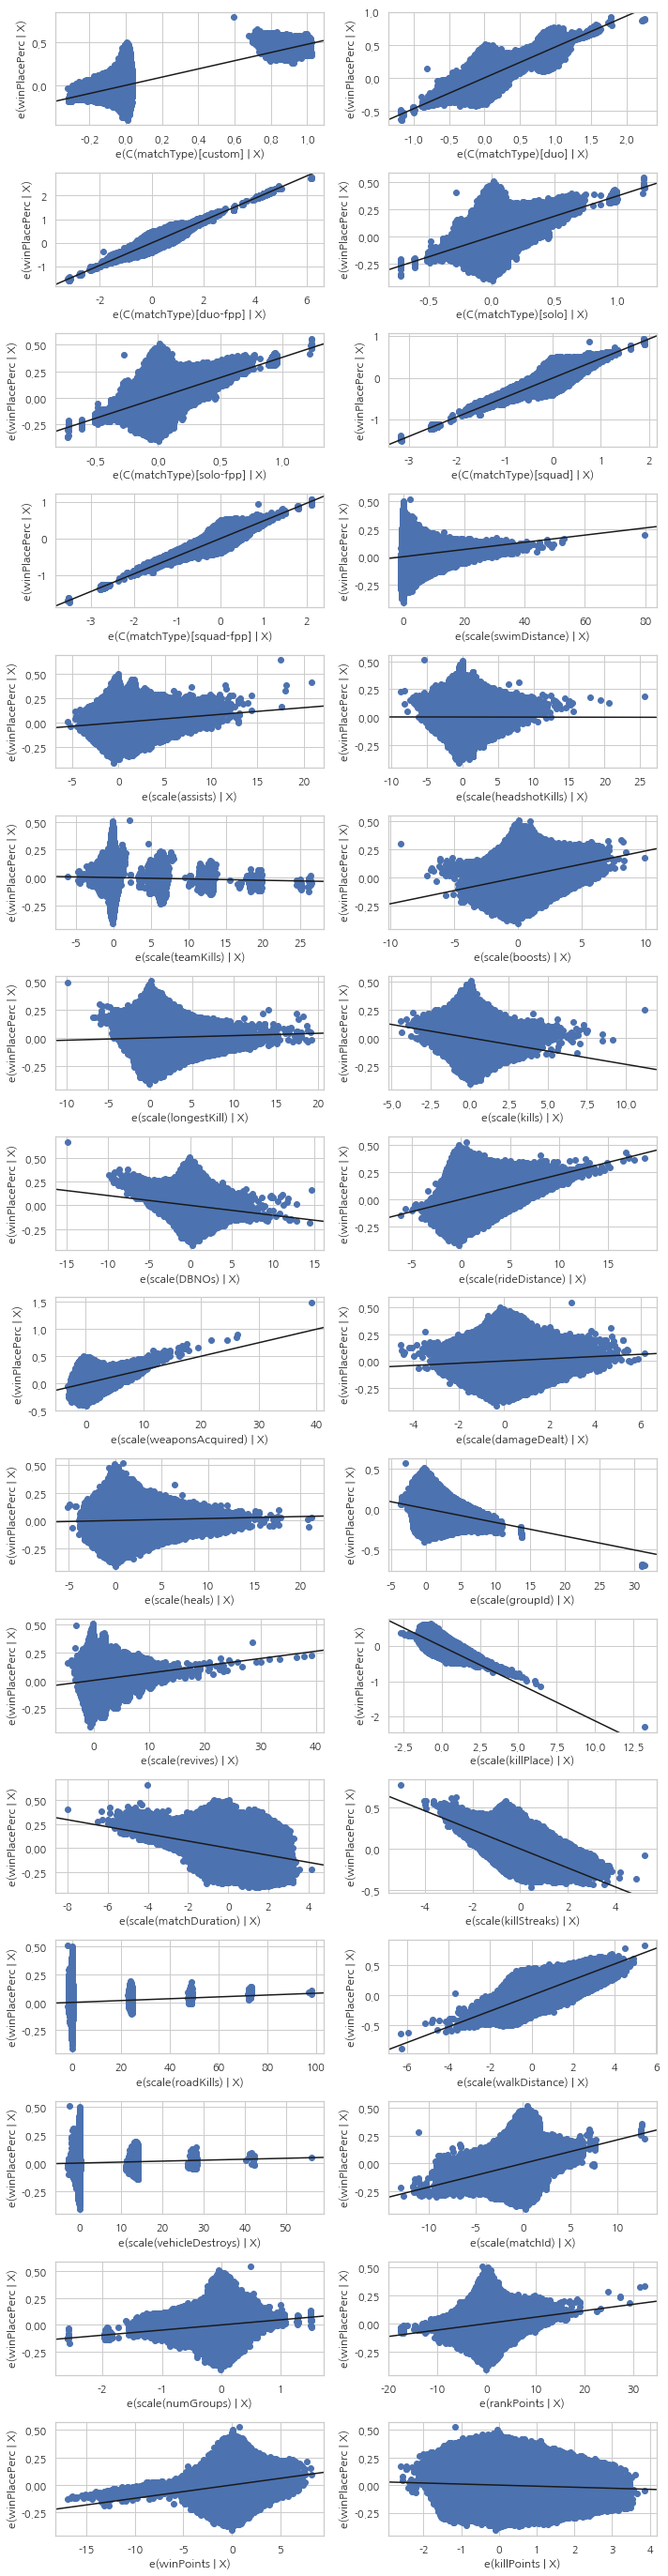

In [44]:
fig = plt.figure(figsize=(10, 40))
sm.graphics.plot_partregress_grid(result, fig=fig)
fig.suptitle("")
plt.show()

### 3.2.5 종합
- **Point System을 통합하여 모델을 단순화 함**
- **Fox' Outlier Recommendation을 이용하여 outlier를 선별하여 제거**
- **Hacker 제거**
- **모델의 MAE는 약 0.07540 정도**
- **Kaggle 상에서의 MAE는 0.0840임**

# 4. Submission

## 4.1 Preprocessing

### 4.1.1 `groupId`를 `numGroupMembers`(그룹 내 팀원 수)로 변경

In [ ]:
test["groupId"] = test.groupby("groupId")["groupId"].transform('count')
test.rename(columns= {"groupId": "numGroupMembers"}, inplace=True)
test["numGroupMembers"].tail()

### 4.1.2 `matchId`를 `numMatchMembers`(match 참여 인원수)로 변경

In [ ]:
test["matchId"] = test.groupby("matchId")["matchId"].transform('count')
test.rename(columns= {"matchId": "numMatchMembers"}, inplace=True)
test["numMatchMembers"].tail()

### 4.1.3 `matchType`
- 10가지의 **custom type**은 "custom" 이라는 문자열로 치환

In [ ]:
normal_match = ['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo']
test["matchType"] = test["matchType"]\
.apply(lambda x: x if x in normal_match else "custom")

메모리 축소를 위해 **category형으로 변환**

In [122]:
test["matchType"] = test["matchType"].astype("category")

### 4.1.4 Point System

#### 4.1.4.1 pointSystem 칼럼 추가

In [ ]:
test["pointsSystem"] = test["rankPoints"].apply(lambda x: "kill&win" if (x == -1) or (x == 0) else "rank")

#### 4.1.4.2 `ranPoints` 내 -1을 0으로 변경

In [ ]:
test["rankPoints"] = test["rankPoints"].apply(lambda x: 0 if x == -1 else x)

#### 4.1.4.3 Scaling

In [ ]:
test = test.groupby(by="pointsSystem").apply(scale_points)
test[["pointsSystem", "rankPoints", "winPoints", "killPoints"]].head(10)

## 4.2 submission

### 4.2.1 Test Data 예측

In [ ]:
test_pred = result.predict(test)

### 4.2.2 submission 파일 구성

In [ ]:
subm = pd.concat([test[["Id"]], test_pred], axis=1)
subm.columns = ["Id", "winPlacePerc"]
subm.tail()

#### Traget Value(winPlacePerc) 조정
- 0 $\le$ **winPlacePerc** $\le$ 1
- 0보다 작은 예측값 0으로 조정
- 1보다 큰 예측값 1로 조정

In [39]:
subm.loc[subm["winPlacePerc"] < 0, "winPlacePerc"] = 0 
subm.loc[subm["winPlacePerc"] > 1, "winPlacePerc"] = 1 

In [40]:
subm.to_csv("submission_v2.csv", index=False)